In [43]:
import PIL.Image
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [1]:
from tensorflow import keras
model = keras.models.load_model('171cropped.h5')

In [25]:
!ls ../train/photoRaw/leapCropped/

A  B  E  G  H  I  L  P	R  V  W


In [92]:
testfile = "../train/photoRaw/leapCropped/P/P-1000.jpeg"

In [23]:
!eog ../train/photoRaw/leapCropped/W-1000.jpeg

In [94]:
image = PIL.Image.open(testfile)

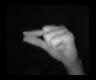

In [95]:
image

In [96]:
open_cv_image = np.array(image) 
# Convert RGB to BGR 
# open_cv_image = open_cv_image[:, :, ::-1].copy()

In [97]:
open_cv_image= cv2.resize(open_cv_image,(64,64))

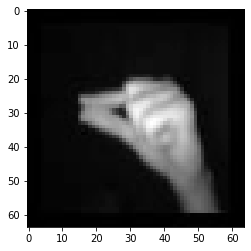

In [98]:
plt.imshow(open_cv_image, cmap=plt.get_cmap('gray'))
plt.show()

In [99]:
def image_resize(image, width = None, height = None, inter = cv2.INTER_AREA):
    # initialize the dimensions of the image to be resized and
    # grab the image size
    dim = None
    (h, w) = image.shape[:2]

    # if both the width and height are None, then return the
    # original image
    if width is None and height is None:
        return image

    # check to see if the width is None
    if width is None:
        # calculate the ratio of the height and construct the
        # dimensions
        r = height / float(h)
        dim = (int(w * r), height)

    # otherwise, the height is None
    else:
        # calculate the ratio of the width and construct the
        # dimensions
        r = width / float(w)
        dim = (width, int(h * r))

    # resize the image
    resized = cv2.resize(image, dim, interpolation = inter)

    # return the resized image
    return resized

def padImageToSize(oldImg, newHeight, newWidth, fillVal=0, isGrayscale=True):
    
    if isGrayscale:
        oldHeight, oldWidth = oldImg.shape
        result = np.full((newHeight, newWidth), fillVal, dtype=np.uint8)
    else:
        oldHeight, oldWidth, oldDepth = oldImg.shape
        result = np.full((newHeight, newWidth, oldDepth), fillVal, dtype=np.uint8)

    xCenter = (newWidth - oldWidth) // 2
    yCenter = (newHeight - oldHeight) // 2

    result[yCenter: yCenter + oldHeight, xCenter:xCenter + oldWidth] = oldImg

    return result

In [100]:
open_cv_image = np.array(image) 

ValueError: could not broadcast input array from shape (171,205) into shape (171,17)

In [101]:
open_cv_image = image_resize(open_cv_image, height = 171)


In [104]:
open_cv_image.shape

(171, 205)

In [102]:
open_cv_image = padImageToSize(open_cv_image, 171, 171, fillVal=0, isGrayscale=True)


ValueError: could not broadcast input array from shape (171,205) into shape (171,17)

In [ ]:

open_cv_image = open_cv_image.reshape((1, open_cv_image.shape[0], open_cv_image.shape[1], 1))


In [74]:
classes = ['A', 'B', 'E', 'G', 'H', 'I', 'L', 'P', 'R', 'V', 'W']

In [88]:
model.predict(open_cv_image)[0]

array([-15011.153 ,  -2079.3015, -13877.45  ,  -4527.958 , -14725.529 ,
        -6111.032 , -12415.497 , -11888.466 , -12277.454 ,  -6464.8623,
         3575.6426], dtype=float32)

In [85]:
predIndex = np.argmax(model.predict(open_cv_image)[0])
classes[predIndex]

'W'